# Titanic Data Science Solutions

## Workflow Stages
The competition solution workflow undergoes seven phases as outlined in the **Data Science Solutions** book.

1. **Define the question or problem.**
2. **Gather training and testing data.**
3. **Organize, prepare, and purify the data.**
4. **Analyze, recognize patterns, and explore the data.**
5. **Model, forecast, and address the problem.**
6. **Visualize, document, and present the steps of problem-solving and the ultimate solution.**
7. **Provide or submit the results.**

The workflow delineates the typical order in which each phase may follow the next. However, there are scenarios with exceptions:
- Multiple workflow phases may be combined. For instance, data may be analyzed during its visualization.
- A phase might be conducted earlier than suggested. Data can be analyzed both before and after it is organized.
- A phase may be repeated multiple times in the workflow. For example, visualization may occur several times.
- A phase might be omitted entirely. For some projects, the submission phase may not be necessary to commercialize or enable services using our dataset for a competition.

## Question and Problem Definition
Given a training dataset listing passengers who either survived or didn't survive the Titanic disaster, can our model predict, using a test dataset that lacks survival information, whether these passengers survived?

## Workflow Goals
The data science solutions workflow aims to achieve seven key objectives:

- **Classifying.** Our aim might be to classify or categorize our samples, and to understand the impact or correlation of various classes with our solution goal.

- **Correlating.** The approach could involve analyzing available features in the training dataset to determine which ones significantly contribute to our solution goal. It is important to evaluate whether there is a statistical correlation between a feature and the solution outcome and if changes in feature values alter the solution state and vice versa. This assessment is valid for both numerical and categorical features in the dataset. It also involves exploring correlations between features that go beyond survival to aid further goals and workflow stages.

- **Converting.** The modeling phase requires data preparation, where depending on the model algorithm, features might need to be converted to numerical equivalents, such as converting categorical text values to numbers.

- **Completing.** Preparing data may also involve estimating missing values within a feature since model algorithms typically perform best when no values are missing.

- **Correcting.** The training dataset might be scrutinized for errors or potentially inaccurate values within features, aiming to correct these values or exclude the samples that contain these errors. This could involve identifying outliers among our samples or features, or completely discarding a feature if it doesn't contribute to the analysis or might significantly skew the results.

- **Creating.** There may be opportunities to create new features based on an existing feature or a group of features, ensuring the new feature aligns with correlation, conversion, and completeness objectives.

- **Charting.** The selection of appropriate visualization plots and charts depends on the nature of the data and the solution goals.


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire data


In [4]:
train_df = pd.read_csv('C:/Users/guoyi/iCloudDrive/23s2 course content/SC1015 intro to DSAI/mini Proj/train.csv')
test_df = pd.read_csv('C:/Users/guoyi/iCloudDrive/23s2 course content/SC1015 intro to DSAI/mini Proj/test.csv')
combine = [train_df, test_df]

## Analyze by describing data


In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

- Continous: Age, Fare. Discrete: SibSp, Parch.

In [6]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
- Cabin > Age are incomplete in case of test dataset.

- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

In [49]:
train_df.info()
print(' '*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int32
 3   Age        891 non-null    int32
 4   Fare       891 non-null    int32
 5   Embarked   891 non-null    int32
 6   Title      891 non-null    int64
 7   IsAlone    891 non-null    int64
 8   Age*Class  891 non-null    int64
dtypes: int32(4), int64(5)
memory usage: 48.9 KB
                                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   Age          418 non-null    int32
 4   Fare         418 non-null    int32
 5  

### distribution of numerical feature values across the samples

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [50]:
train_df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,2.133558,1.505051,0.361392,1.728395,0.602694,4.162738
std,0.486592,0.836071,0.477990,7.615265,1.118148,0.635673,1.030039,0.489615,14.677025
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,1.000000,0.000000,2.000000
50%,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,2.000000,5.000000,1.000000,222.000000


### the distribution of categorical features?

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Assumptions Based on Data Analysis

### Correlating

We aim to assess how closely each feature is associated with survival at the project's onset, intending to compare these preliminary findings with correlations derived from more detailed models later in the projec### 

## Completing

- The **Age** feature might be completed as it appears to have a significant correlation with survival.
- Completing the **Embarked** feature could also be crucial, as it might relate to survival or another critical fea#ture.

## Correcting

- The **Ticket** feature might be excluded from our analysis due to a high duplication rate (22%) and a possible lack of correlation with survival.
- **Cabin** could be omitted because it is highly incomplete or mostly null in both the training and test datasets.
- **PassengerId** should be removed from the training dataset as it does not impact survival.
- The **Name** feature, which is relatively non-standard, might also be dropped as it likely does not directly influen#ce survival.

## Creating

- Consider creating a **Family** feature derived from **Parch** and **SibSp** to count family members on board.
- Engineer a new feature from the **Name** field to extract **Title** as a distinct attribute.
- Transform the continuous numerical **Age** feature into an ordinal categorical feature by introducing **Age bands**.
- A **Fare range** feature might also be created to assist our anal#ysis if beneficial.

## Classifying

Further assumptions can be added based on initial problem descriptions:
- Women (Sex=female) had a higher survival rate.
- Children (Age<?) were more likely to survive.
- Upper-class passengers (Pclass=1) had a higher likelihood of survival.


## Analyze by pivoting features


- **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analyzing Data by Visualizing

## Correlating Numerical Features

Utilizing a histogram chart proves valuable for examining continuous numerical variables such as **Age**, where establishing bands or ranges can reveal significant patterns. Histograms show the distribution of samples across automatically determined bins or consistent ranges, aiding in addressing queries about specific age groups (e.g., Did infants have a higher survival rate?).

Note: The x-axis of histogram visualizations denotes the count of samples or passengers.

### Observations

- Infants (Age <=4) exhibited a high survival rate.
- The oldest passengers (Age = 80) survived.
- A significant number of individuals aged 15-25 did not survive.
- The majority of passengers fell within the 15-35 age group.

### Decisions

- Age should be incorporated into our model training, as it is crucial (our assumption under classifying #2).
- Address missing values in the Age data (completing #1).
- Segment age into distinct groups (creating #3).


D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


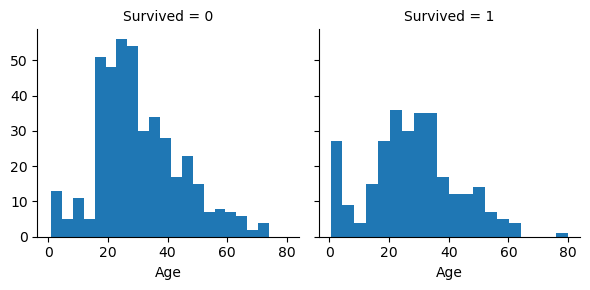

In [15]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Correlating Numerical and Ordinal Features

Utilize a single plot to identify correlations by combining multiple features, both numerical and categorical that have numeric values.

## Observations

- **Pclass=3** had the highest number of passengers, yet the majority did not survive. This observation supports our classifying assumption #2.
- Infant passengers in **Pclass=2** and **Pclass=3** mostly survived, adding further support to our classifying assumption #2.
- The majority of passengers in **Pclass=1** survived, confirming our classifying assumption #3.
- There is variation in the **Age** distribution of passengers across different **Pclass** groups.

## Decisions

- **Pclass** should be considered in our model training.


D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


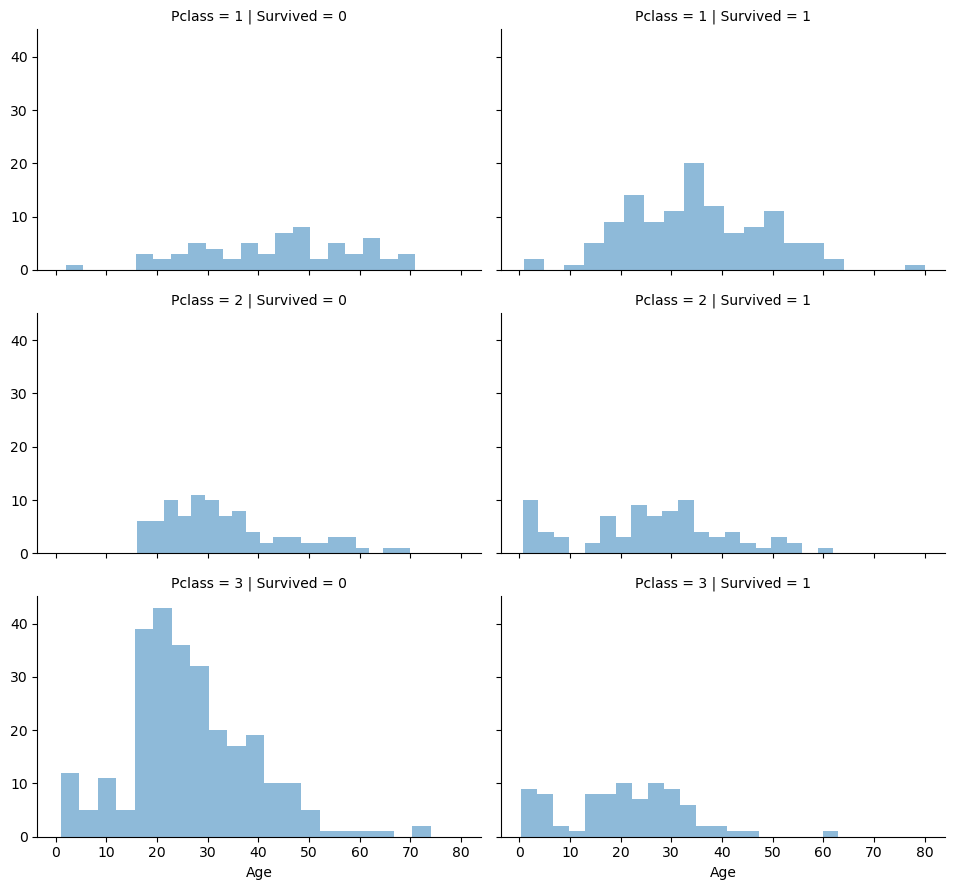

In [16]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Correlating Categorical Features

Correlate categorical features with our solution goal to identify significant relationships.

## Observations

- Female passengers exhibited a significantly higher survival rate compared to males, supporting our classifying assumption (#1).
- An exception was noted at **Embarked=C**, where males displayed a higher survival rate. This suggests a potential correlation between **Pclass** and **Embarked**, and subsequently between **Pclass** and **Survived**, rather than a direct correlation between **Embarked** and **Survived**.
- Males had a better survival rate in **Pclass=3** compared to **Pclass=2** at **Embarked=C** and **Embarked=Q**, underscoring our need to complete information on embarkation (completing #2).
- Survival rates varied among male passengers at different ports of embarkation within **Pclass=3**, aligning with correlating assumption (#1).

## Decisions

- Include the **Sex** feature in model training.
- Complete and incorporate the **Embarked** feature in model training.


D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


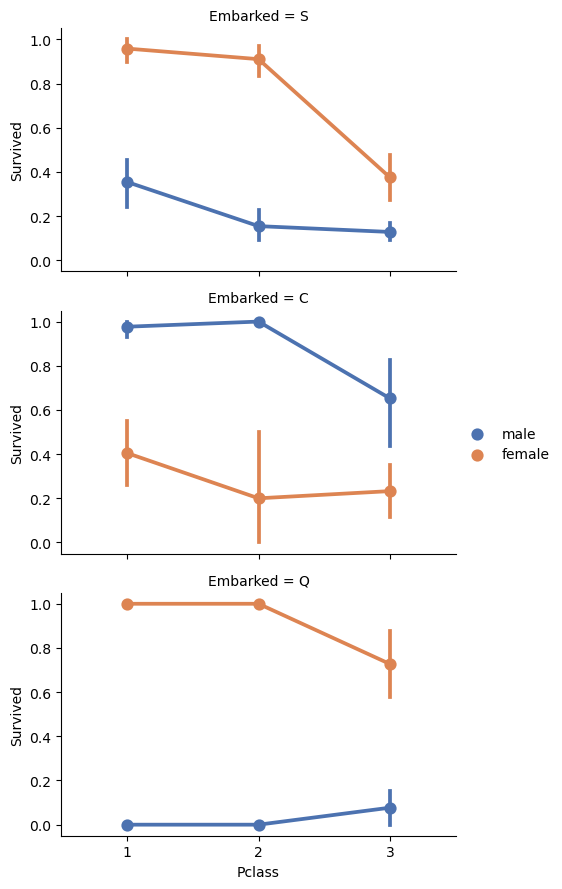

In [17]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Correlating Categorical and Numerical Features

Explore the relationships between categorical features (with non-numeric values) and numeric features. Focus on correlating **Embarked** (categorical non-numeric), **Sex** (categorical non-numeric), **Fare** (numeric continuous), with **Survived** (categorical numeric).

## Observations

- Passengers who paid higher fares had a better survival rate, supporting the idea of creating fare ranges as mentioned in our assumption for creating (#4).
- The port of embarkation shows a correlation with survival rates, confirming our correlating assumption (#1) and the need to complete this information (completing #2).

## Decisions

- Consider implementing fare bands for the **Fare** feature.


D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
D:\Programs\Anaconda\Lib\site-packages\s

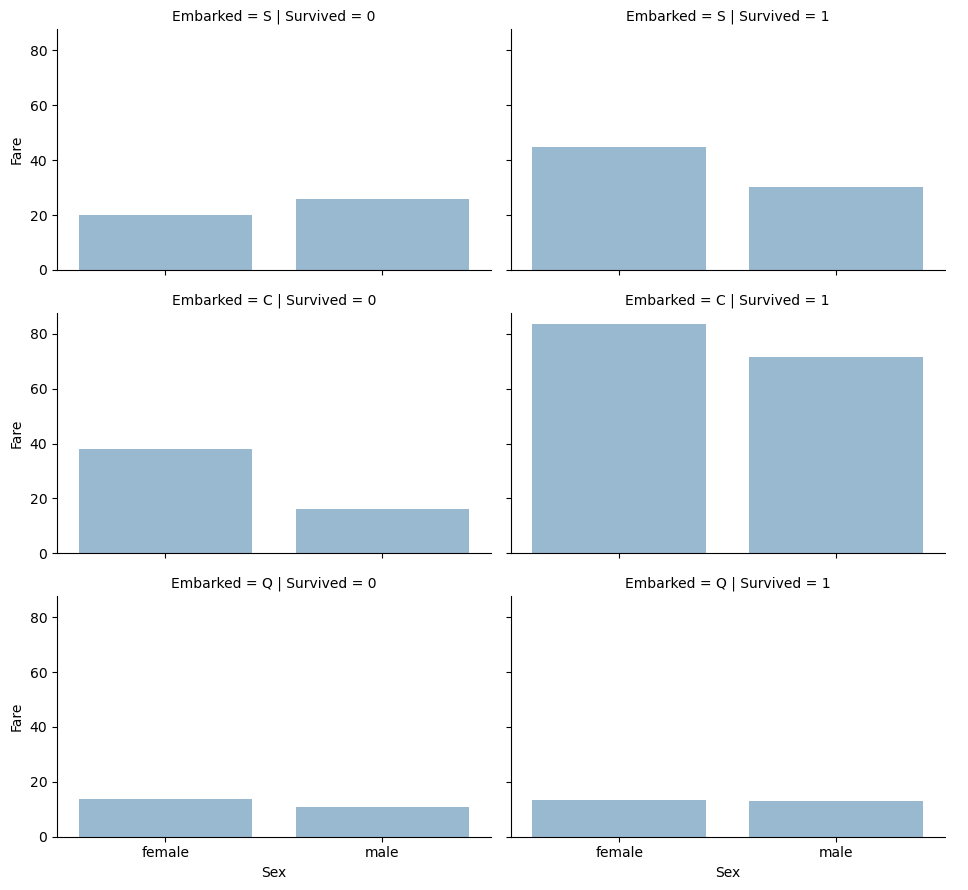

In [18]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data

### Correcting by dropping features


Based on our previous analysis we want to drop the Cabin and Ticket features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [19]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### Creating new feature extracting from existing



**Observations.**


- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision.**

- We decide to retain the new Title feature for model training.

In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


replace many titles with a more common name or classify them as `Rare`.

In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


convert the categorical titles to ordinal.

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


drop the Name feature from training and testing datasets.

In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

converting Sex feature to a new feature called Gender where female=1 and male=0.

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

Note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, ...

D:\Programs\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


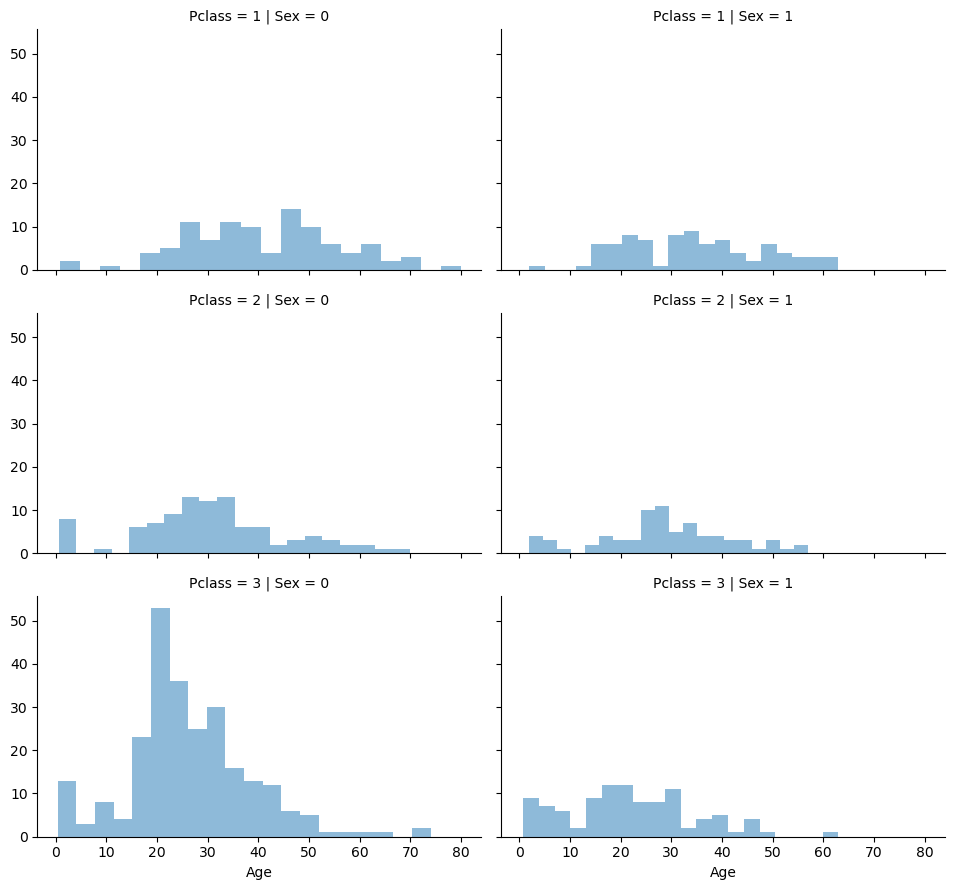

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [31]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [32]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [33]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [34]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [35]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. 

round off the fare to two decimals

In [38]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create FareBand.

In [39]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [40]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [41]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve

Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, Choices include:

- Logistic Regression
- Decision Tree
- Random Forrest

In [42]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. 

the confidence score generats by the model based on our training dataset.

In [43]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

# Validating Assumptions with Logistic Regression

Logistic Regression can be employed to validate our assumptions and decisions related to feature creation and completion by examining the coefficients of the features in the decision function.

## Key Insights from Logistic Regression

- **Positive Coefficients**: These increase the log-odds of the response, enhancing the probability of the outcome. A significant observation is the **Sex** feature, which has the highest positive coefficient, indicating that as the Sex value increases (from male: 0 to female: 1), the probability of Survived=1 also increases significantly.

- **Negative Coefficients**: These decrease the log-odds of the response, reducing the probability of the outcome. For instance, as **Pclass** increases, the probability of Survived=1 decreases the most. This highlights the inverse relationship between Pclass and survival.

- **Artificial Feature Inclusion**: The interaction term **Age\*Class** emerges as a good artificial feature for modeling, as it exhibits the second-highest negative correlation with survival. Similarly, **Title** stands out with the second-highest positive correlation with survival.

## Decisions

Based on these findings:
- Prioritize features with strong positive or negative coefficients in the logistic regression model to refine the predictive accuracy.
- Consider creating and using artificial interaction features like **Age\*Class** and **Title** that have shown significant correlations with the outcome.


In [44]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


# Decision Tree Model Overview

The decision tree model is a predictive modeling technique used for both classification and regression tasks:

- **Classification Trees**: In these tree structures, the target variable takes a finite set of values. The leaves of the tree represent class labels, while the branches represent conjunctions of features that lead to these labels.

- **Regression Trees**: These trees are used when the target variable can take continuous values, typically real numbers. In regression trees, the path from the root to the leaf represents decision rules applicable to the input features.

## Model Confidence

- The model confidence score for the decision tree is the highest among all models evaluated so far, indicating its strong predictive performance.

This clear distinction between classification and regression trees helps in understanding the specific application and utility of decision trees depending on the nature of the target variable and the dataset at hand.


In [45]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

# Random Forest Model Overview

Random Forests are one of the most popular machine learning methods used today. They are an ensemble learning method applicable to both classification and regression tasks. Here’s how they work:

- **Ensemble Learning Method**: Random Forests operate by constructing multiple decision trees during training. For a classification task, the final prediction is the mode of the classes predicted by individual trees; for a regression task, it is the mean prediction of the trees.

- **Parameter: n_estimators**: Typically, Random Forests consist of multiple trees (e.g., `n_estimators=100`), which means 100 decision trees are constructed.

## Model Confidence

- The confidence score of the Random Forest model is the highest among all models evaluated, highlighting its robustness and reliability in predictive accuracy.

## Decision for Competition Submission

- Based on the superior performance of the Random Forest model, we have decided to use its output (`Y_pred`) for our competition submission of results. This decision underscores our confidence in the model's predictive capabilities and its suitability for handling the task at hand.


In [46]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Model evaluation


In [47]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_log, 
              acc_random_forest,
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,86.76
2,Decision Tree,86.76
0,Logistic Regression,80.36


In [48]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('C:/Users/guoyi/iCloudDrive/23s2 course content/SC1015 intro to DSAI/mini Proj/submission.csv', index=False)

Our submission to the competition site Kaggle , achieving a 77.00 score.

## References
- [Getting Started with Pandas: Kaggle's Titanic Competition](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests)